<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Sources" data-toc-modified-id="Data-Sources-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Sources</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Methodology</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-provided" data-toc-modified-id="Data-provided-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data provided</a></span><ul class="toc-item"><li><span><a href="#Data-reading" data-toc-modified-id="Data-reading-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data reading</a></span></li><li><span><a href="#Data-cleaning:-tn_movie_budgets" data-toc-modified-id="Data-cleaning:-tn_movie_budgets-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Data cleaning: tn_movie_budgets</a></span></li><li><span><a href="#Data-cleaning:-imdb_title_basics" data-toc-modified-id="Data-cleaning:-imdb_title_basics-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Data cleaning: imdb_title_basics</a></span></li><li><span><a href="#Join-the-two-dataframes" data-toc-modified-id="Join-the-two-dataframes-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Join the two dataframes</a></span></li></ul></li><li><span><a href="#Netflix-data" data-toc-modified-id="Netflix-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Netflix data</a></span><ul class="toc-item"><li><span><a href="#Web-scraping" data-toc-modified-id="Web-scraping-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Web scraping</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Data cleaning</a></span></li></ul></li><li><span><a href="#Franchises-data" data-toc-modified-id="Franchises-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Franchises data</a></span><ul class="toc-item"><li><span><a href="#Web-scraping" data-toc-modified-id="Web-scraping-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Web scraping</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Data cleaning</a></span></li></ul></li><li><span><a href="#Video-Game-Movies-data" data-toc-modified-id="Video-Game-Movies-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Video Game Movies data</a></span></li></ul></li><li><span><a href="#Visualisations-and-Insights" data-toc-modified-id="Visualisations-and-Insights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualisations and Insights</a></span><ul class="toc-item"><li><span><a href="#Number-of-movies-released" data-toc-modified-id="Number-of-movies-released-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Number of movies released</a></span></li><li><span><a href="#Profit-and-Profit-Margin" data-toc-modified-id="Profit-and-Profit-Margin-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Profit and Profit Margin</a></span></li><li><span><a href="#Impact-of-Budget" data-toc-modified-id="Impact-of-Budget-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Impact of Budget</a></span></li><li><span><a href="#Runtime" data-toc-modified-id="Runtime-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Runtime</a></span></li><li><span><a href="#Genre" data-toc-modified-id="Genre-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Genre</a></span><ul class="toc-item"><li><span><a href="#Future-movies" data-toc-modified-id="Future-movies-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Future movies</a></span></li></ul></li><li><span><a href="#Release-date" data-toc-modified-id="Release-date-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Release date</a></span><ul class="toc-item"><li><span><a href="#Release-month" data-toc-modified-id="Release-month-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Release month</a></span></li><li><span><a href="#Release-day" data-toc-modified-id="Release-day-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Release day</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Case-study:-Netflix-Original-Films" data-toc-modified-id="Case-study:-Netflix-Original-Films-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Case study: Netflix Original Films</a></span></li></ul></li><li><span><a href="#Conclusion-and-Future-Work" data-toc-modified-id="Conclusion-and-Future-Work-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion and Future Work</a></span></li></ul></div>

<b>Final Project Submission</b>

Please fill out:
* Student name: Nadine Amersi-Belton
* Student pace: part time
* Scheduled project review date/time: TBC
* Instructor name: TBC
* Blog post URL: TBC


# Introduction

## Problem Statement

In January 2020, Microsoft Inc. ("the company") decides to enter the movie industry and creates a movie studio. The company approaches consultancy XYZ to provide data-driven insights into the industry and determine what makes a successful movie.

<b> Questions we seek to answer: </b>
- How profitable are movies? 
- What budget should be allocated? 
- What movie genres are currently performing best? 
- How long should the movie be? 
- When should the movie be released? 

## Data Sources

Data has been provided and can be found in **link**.

The data comes from:
- Box Office Mojo
- IMDB
- Rotten Tomatoes
- TheMovieDB.org
- The-numbers

In addition, we will scrap data from Wikipedia pertaining to franchises and Netflix original films.

## Methodology

The process can be divided into two parts.

Section 2 focuses on data preparation. 
<br> The steps include: 
- Importing libraries
- Reading and cleaning provided data
- Dealing with missing values
- Scraping additional data and cleaning it
- Joining datasets

Section 3 focuses on visualisations and insights. 
<br> For each characteristic we will be:
- Conducting feature engineering where applicable
- Creating visualisations
- Drawing conclusions

Finally section 4 sets out a summary of our findings and suggested future work.

# Data Preparation

In [1]:
# Import the necessary packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from glob import glob
from bs4 import BeautifulSoup
import requests

%matplotlib inline

## Data provided

### Data reading

The data provided is in the zippedData folder. There are a number of .csv and .tsv files. To easily read them all together we make use of glob.

In [2]:
# Create a list of all csv files using glob
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

We will create a dictionary of DataFrames with key the name of the file and value a Pandas DataFrame. This will allow us to then preview all the data by iterrating over the dictionary.

In [3]:
# Create a dictionary of DataFrames
csv_dict = {}
for file in csv_files:
    filename = file.split('zippedData/')[-1].replace(".csv.gz", "").replace(".", "_") # Clean filename
    file_df = pd.read_csv(file) # Create DataFrame
    csv_dict[filename] = file_df # Insert DataFrame into dictionary

In [4]:
# Preview the data
for name, df in csv_dict.items():
    print(name)
    display(df.head()) # Using display instead of print leads to neater formatting in Jupyter Notebook
    print("------------------ \n")

imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


------------------ 

tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


------------------ 

imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


------------------ 

imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


------------------ 

imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


------------------ 

imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


------------------ 

tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


------------------ 

bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


------------------ 

imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


------------------ 



We then repeat this process for the .tsv files.

In [5]:
# Create a list of all tsv files using glob
tsv_files = glob("./zippedData/*.tsv.gz")
tsv_files

['./zippedData/rt.reviews.tsv.gz', './zippedData/rt.movie_info.tsv.gz']

In [6]:
# Create a dictionary of DataFrames
tsv_dict = {}
for file in tsv_files:
    filename = file.split('zippedData/')[-1].replace(".tsv.gz", "").replace(".", "_") # Clean filename
    file_df = pd.read_table(file, delimiter = '\t', encoding = 'latin-1') # Create DataFrame
    tsv_dict[filename] = file_df # Insert dataframe into dictionary 

In [7]:
# Preview the data
for name, df in tsv_dict.items():
    print(name)
    display(df.head()) # Using display instead of print leads to neater formatting in Jupyter Notebook
    print("------------------ \n")

rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


------------------ 

rt_movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


------------------ 



<b> Summary </b>

We have a number of DataFrames and the first step is to consider which ones will best answer our questions and should be the focus of our analysis. Due to time constraints, it is unlikely that we wil be able to clean all DataFrame and investigate all features.

The first DataFrame which stands out is <b>tn_movie_budgets</b>. This table shows the production budget, domestic and worldwide gross. This financial information will be valuable in exploring the meaning of profit. It will also allow us to distinguish which films perfomed best in the box office as we will be able to focus some of our analysis on the top 100 grossing movies.

In [8]:
# tn_movie_budgets 
tnmb = csv_dict['tn_movie_budgets']
tnmb.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


The second DataFrame which we will investigate is <b>imdb_title_basics</b>. This table provides us with key features, namely the genre(s) of the movie and its runtime.

In [175]:
# imdb_title_basics
imdb = csv_dict['imdb_title_basics']
imdb.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


We note that the <b>bom_movie_gross</b> DataFrame also provides details of revenue (domestic and foreign gross) but does not feature the production budget. To strengthen the reliability of the figures, it would be worthwhile comparing the figures with those in <b>tn_movie_budgets</b>.However this is outside the scope of this preliminary analysis.

Whilst <b>rt_movie_info</b> also provides details of genre and runtime, we have chosed to use the <b>imdb</b> data on the basic that we can more easily access further attributes and match them using imdb's unique <i>tconst</i> identifyer. Again to strengthen the reliability of the data, it would be worthwhile to compare the two. However again this is outside the scope of this preliminary analysis.

### Data cleaning: tn_movie_budgets

In this section we will manipulate the <b> tn_movie_budgets </b> DataFrame to ensure it is ready to for visualisations and insights.

In [190]:
# Set tn_movie_budgets DataFrame as tnmb
tnmb = csv_dict['tn_movie_budgets']
tnmb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [191]:
# Get Summary
tnmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
release_year         5782 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 316.3+ KB


From the summary above, we note that we have 5,782 rows with data. We will first need to check for duplicates. We note that the <b>release_date</b> entries will need to be changed to DateTime object and the <b>production_budget</b>, <b>domestic_gross</b> and <b>worldwide_gross</b> entries will need to be changed from to reflect that they are numeric. As all columns have 5,782 entries there does not appear to be any missing values. However we will check this by viewing the summary statistics.

In [192]:
# See if any duplicates
tnmb.duplicated().any()

False

There are no identical rows.

In [193]:
# Remove id column
tnmb = tnmb.drop('id', axis = 1)
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


We will convert the <b>release_date</b> entries to be of type DateTime so we can easily extract the year. When looking at when to release a movie we will further extract the month and day.

In [194]:
# Convert release_date to a datetime object
tnmb['release_date'] = pd.to_datetime(tnmb['release_date'])

In [195]:
# Create year column 
tnmb['release_year'] = pd.DatetimeIndex(tnmb['release_date']).year

We note that the <b>production budget</b>, <b>domestic_gross</b> and <b>worldwide_gross</b> entries all require the same type of "cleaning", namely to remove the \$ symbol, the comma seperator and convert to integer. As such it is useful to define a function to make these changes and then use our function on the three columns.

In [196]:
# Define function to clean numbers
def numclean(df,col):
    '''
    param1 = Pandas DataFrame
    param2 = Column
    Removes $ symbol, removes ',' seperator and changes to int type
    Returns DataFrame
    '''
    df[col]=df[col].str.replace("$","").str.replace(",","").astype('int')
    return df

In [197]:
# Run function on the three columns
numclean(tnmb,'production_budget')
numclean(tnmb,'domestic_gross')
numclean(tnmb,'worldwide_gross')

AttributeError: Can only use .str accessor with string values!

We will use the <b>describe.()</b> method to obtain summary statistics and better understand our data as well as check for anomalies.

In [200]:
tnmb.describe()

,production_budget,domestic_gross,worldwide_gross,release_year
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139
std,4.181208e+07,6.824060e+07,1.747200e+08,12.724386
min,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000
50%,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000
75%,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000
max,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000


From the above, we note that there are entries where the worldwide gross is zero. It is worth investigating this further. We also note that the movies span the years 1915 to 2020.

In [201]:
# Investigate rows where worldwide_gross is 0
tnmb[tnmb['worldwide_gross'] == 0]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,2020-12-31,Moonfall,150000000,0,0,2020
479,2017-12-13,Bright,90000000,0,0,2017
480,2019-12-31,Army of the Dead,90000000,0,0,2019
535,2020-02-21,Call of the Wild,82000000,0,0,2020
670,2019-08-30,PLAYMOBIL,75000000,0,0,2019
...,...,...,...,...,...,...
5761,2014-12-31,Stories of Our Lives,15000,0,0,2014
5764,2007-12-31,Tin Can Man,12000,0,0,2007
5771,2015-05-19,Family Motocross,10000,0,0,2015
5777,2018-12-31,Red 11,7000,0,0,2018


In [18]:
# Get number of rows where worldwide_gross is 0
len(tnmb[tnmb['worldwide_gross'] == 0])

367

For some movies, we note the release_date is in the future and as such it is normal that the worldwide gross is unavailable. For others we could investigate futher by researching the titles. However as the number of such entries is small compare to the whole dataset, we have chosen to remove these rows.

In [202]:
# Keep only rows where worldwide_gross is non-zero
tnmb = tnmb[tnmb['worldwide_gross'] != 0]

In [21]:
# Reset index
tnmb = tnmb.reset_index(drop = True)

In [203]:
# View first 5 rows
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


This DataFrame is ready.

### Data cleaning: imdb_title_basics

In [204]:
# Set imdb_title_basics as imdb
imdb = csv_dict['imdb_title_basics']
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [205]:
# Get Summary
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


From the summary we note that these is a large dataset, with 146144 entries. The data types appear correct, with <b>runtime_minutes</b> being a float and <b>start_year</b> an integer. There are missing values in the <b>original_title</b>, <b>runtime_minutes</b> and <b>genres</b> columns, which we will investigate and handle. We will also check for duplicates.

In [206]:
# Get number of missing values per column
imdb.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [207]:
# % of missing values for runtime
(imdb['runtime_minutes'].isna().sum()/len(imdb)*100).round(2)

0.0

This is a significant portion of our dataset and as such we cannot simply discard these rows. We will need to fill the missing values with a suitable figure.

In [ ]:
# Consider mean
imdb['runtime_minutes'].mean()

In [208]:
# Consider median
imdb['runtime_minutes'].median()

87.0

The median of 87 minutes is a better option as it is less sensitive to outliers than the mean. We will elect to fill missing values with this figure.

In [28]:
# Fill missing values with median
imdb['runtime_minutes'] = imdb['runtime_minutes'].fillna(imdb['runtime_minutes'].median())

In [29]:
# % of missing values for genre
(imdb['genres'].isna().sum()/len(imdb)*100).round(2)

3.7

In [30]:
# % of missing values for original_title
(imdb['original_title'].isna().sum()/len(imdb)*100).round(2)

0.01

For both genre and original titles, the missing values are a much smaller percent of our dataset and as such we will choose to drop the rows with missing data.

In [31]:
# Drop rows that contain null values
imdb = imdb.dropna()

In [32]:
# Check for duplicates
imdb.duplicated().any()

False

We will use the <b>describe.()</b> method to obtain summary statistics and better understand our data as well as check for anomalies.

In [209]:
# Get summary statistics
imdb.describe()

,start_year,runtime_minutes
count,146144.000000,146144.000000
mean,2014.621798,86.363758
std,2.733583,147.191650
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,87.000000
75%,2017.000000,95.000000
max,2115.000000,51420.000000


We note that the star_year spans 2010 to 2115! 

In [34]:
futuremovies = imdb[imdb['start_year'] >= 2020]
futuremovies

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,87.0,"Action,Adventure,Fantasy"
93,tt0427340,Masters of the Universe,Masters of the Universe,2021,87.0,"Action,Adventure,Drama"
229,tt0499097,Without Remorse,Without Remorse,2020,87.0,"Action,Crime,Drama"
289,tt0805647,The Witches,The Witches,2020,87.0,"Adventure,Comedy,Family"
386,tt0870154,Jungle Cruise,Jungle Cruise,2020,87.0,Adventure
...,...,...,...,...,...,...
145902,tt9883664,Equally Friends,Equally Friends,2020,47.0,"Biography,Comedy,Drama"
145905,tt9883996,Dream Horse,Dream Horse,2020,87.0,Drama
145914,tt9886444,Nuestra última fiesta,Nuestra última fiesta,2020,63.0,"Comedy,Crime,Horror"
145934,tt9887580,Bulletproof 2,Bulletproof 2,2020,87.0,"Action,Comedy"


In [35]:
# Rename primary title to movie and start_year to release_year
imdb = imdb.rename(columns = {'primary_title':'movie', 'start_year' : 'release_year'})
# Drop original title column
imdb = imdb.drop('original_title', axis = 1)

In [36]:
imdb.head()

,tconst,movie,release_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


This dataframe is ready

### Join the two dataframes

In [37]:
# Number of rows for tnmb and imdb DataFrames
display(len(tnmb), len(imdb))

5415

140734

Is name a unique identifyer?

In [38]:
# Number of movies with same name in tnmb
len(tnmb[tnmb.duplicated('movie')])

76

In [39]:
# Number of movies with same name in imdb
len(imdb[imdb.duplicated('movie')])

9400

In [40]:
# Sort tnmb by release year
tnmb = tnmb.sort_values('release_year', ascending = False)
# Drop duplicates, keep first occurence
tnmb = tnmb.drop_duplicates(subset = 'movie', keep = 'first')

In [41]:
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
95,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019
1358,2019-05-31,Rocketman,41000000,57342725,108642725,2019
3814,2019-05-03,The Intruder,8000000,35095904,36005871,2019
3778,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019
254,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019


In [42]:
# Check using Godzilla
tnmb[tnmb['movie'] == 'Godzilla']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
140,2014-05-16,Godzilla,160000000,200676069,529076069,2014


In [43]:
# Sort imdb by release date
imdb = imdb.sort_values('release_year', ascending = False)
# Drop duplicates, keep first occurence
imdb = imdb.drop_duplicates(subset = 'movie', keep = 'first')

In [44]:
# Drop release_year 
imdb = imdb.drop('release_year', axis = 1)

In [45]:
imdb.head()

,tconst,movie,runtime_minutes,genres
89506,tt5174640,100 Years,87.0,Drama
96592,tt5637536,Avatar 5,87.0,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,87.0,Fantasy
52213,tt3095356,Avatar 4,87.0,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,87.0,"Adventure,Family,Fantasy"


In [46]:
# merge imdb and tnmb
movies = pd.merge(tnmb, imdb, on = ['movie'])

In [47]:
movies

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi"
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music"
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery"
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation"
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation"
...,...,...,...,...,...,...,...,...,...
2079,1942-08-13,Bambi,858000,102797000,268000000,1942,tt2668120,58.0,"Biography,Documentary"
2080,1940-11-13,Fantasia,2280000,83320000,83320000,1940,tt3591950,86.0,Drama
2081,1940-03-21,Rebecca,1288000,6000000,6002370,1940,tt10430534,87.0,Horror
2082,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925486,184925486,1937,tt7821084,49.0,"Animation,Family"


<p style="color:red">TBD: Additional Data - webs scraping to look at franchise</p>

## Netflix data

https://en.wikipedia.org/wiki/List_of_original_films_distributed_by_Netflix

### Web scraping

In [48]:
# Obtain details of highest grossing franchises
url = requests.get('https://en.wikipedia.org/wiki/List_of_original_films_distributed_by_Netflix')
soup = BeautifulSoup(url.content, 'html.parser')

# Look for tables on wikipedia page
tables = list(soup.findAll('table', {'class':'wikitable sortable'}))
len(tables)

11

In [49]:
# Look at first table
table = tables[0]

# Seperate each entry in the table - start as 1 as 0 is just header
entries = table.findAll('tr')[1:]

# Investigate first entry
entry = entries[0]
entry

<tr>
<td><i><a href="/wiki/Beasts_of_No_Nation_(film)" title="Beasts of No Nation (film)">Beasts of No Nation</a></i>
</td>
<td><a href="/wiki/War_film" title="War film">War</a>/<a href="/wiki/Drama_(film_and_television)" title="Drama (film and television)">drama</a>
</td>
<td><span data-sort-value="000000002015-10-16-0000" style="white-space:nowrap">October 16, 2015</span>
</td>
<td><span data-sort-value="136 !">2 hours, 16 min.</span>
</td>
<td>English/Twi
</td></tr>

In [50]:
# Extract text
text = entry.text.strip().split('\n\n')
text

['Beasts of No Nation',
 'War/drama',
 'October 16, 2015',
 '2 hours, 16 min.',
 'English/Twi']

In [51]:
# Work on length to get runtime in mins
hours = entry.text.strip().split('\n\n')[3].split()[0]
mins = entry.text.strip().split('\n\n')[3].split()[2]
runtimemins = int(hours)*60+int(mins)
runtimemins

136

In [52]:
# Create list of runtimes in mins
netflixruntimes = []
for entry in entries:
    hours = entry.text.strip().split('\n\n')[3].split()[0]
    try:
        mins = entry.text.strip().split('\n\n')[3].split()[2]
        runtimemins = int(hours)*60+int(mins)
        netflixruntimes.append(runtimemins)
    except:
        runtimemins = int(hours)*60
        netflixruntimes.append(runtimemins)   

In [53]:
# Create other lists 
netflixmovies = [entry.text.strip().split('\n\n')[0] for entry in entries]
netflixgenres = [entry.text.strip().split('\n\n')[1] for entry in entries]
netflixpremier_dates = [entry.text.strip().split('\n\n')[2] for entry in entries]
netflixlanguages = [entry.text.strip().split('\n\n')[4] for entry in entries]

In [54]:
# Create dataframe from lists
netflixdf = pd.DataFrame([netflixmovies, netflixgenres, netflixpremier_dates, netflixruntimes, netflixlanguages]).transpose()
netflixdf.columns = ['movie', 'genre', 'release_date', 'runtime_minutes', 'language']
netflixdf.head()

,movie,genre,release_date,runtime_minutes,language
0,Beasts of No Nation,War/drama,"October 16, 2015",136,English/Twi
1,The Ridiculous 6,Western,"December 11, 2015",119,English
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,"February 26, 2016",103,English
3,Pee-wee's Big Holiday,Adventure,"March 18, 2016",89,English
4,Special Correspondents,Satire,"April 29, 2016",100,English


### Data cleaning

In [55]:
# View head
netflixdf.head()

,movie,genre,release_date,runtime_minutes,language
0,Beasts of No Nation,War/drama,"October 16, 2015",136,English/Twi
1,The Ridiculous 6,Western,"December 11, 2015",119,English
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,"February 26, 2016",103,English
3,Pee-wee's Big Holiday,Adventure,"March 18, 2016",89,English
4,Special Correspondents,Satire,"April 29, 2016",100,English


In [56]:
# Get Summary
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
movie              203 non-null object
genre              203 non-null object
release_date       203 non-null object
runtime_minutes    203 non-null object
language           203 non-null object
dtypes: object(5)
memory usage: 8.1+ KB


In [57]:
# Convert release_date to a datetime object
netflixdf['release_date'] = pd.to_datetime(netflixdf['release_date'])

In [58]:
# Convert runtime to int
netflixdf['runtime_minutes'] = netflixdf['runtime_minutes'].astype(int)

In [59]:
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
movie              203 non-null object
genre              203 non-null object
release_date       203 non-null datetime64[ns]
runtime_minutes    203 non-null int64
language           203 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 8.1+ KB


## Franchises data

<p style="color:red">Interested in franchises as many if not most have Movie element and way for Microsoft to utilise existing IP.
Introduce Wiki page</p>

### Web scraping

In [60]:
#Obtain details of highest grossing franchises
url = requests.get('https://en.wikipedia.org/wiki/List_of_highest-grossing_media_franchises')
soup = BeautifulSoup(url.content, 'html.parser')

# Look for tables on wikipedia page.
tables = list(soup.findAll('table', {'class':'wikitable sortable'}))
len(tables)

2

In [61]:
# Look at first table, franchises over $10 billion
table10bil = tables[0]

# Seperate each entry in the table - start as 1 as 0 is just header
entries = table10bil.findAll('tr')[1:]

# Investigate first entry
entry = entries[0]

# Extract info
name = entry.findAll('td')[1].text.strip()
revenue = entry.findAll('td')[3].text.strip().replace("\n","")
originalmedia = entry.findAll('td')[5].text.replace("\n","")
owner = entry.findAll('td')[7].text.replace("\n","")
print(f"Name: {name}, Revenue: {revenue}, Original media : {originalmedia}, Owner: {owner}")

Name: Pokémon, Revenue: est. $95 billion, Original media : Video game, Owner: Nintendo (trademark)  The Pokémon Company  (Nintendo, Game Freak, Creatures) (copyright)


In [62]:
# Create lists 
names = [entry.findAll('td')[1].text.strip() for entry in entries]
revenues = [entry.findAll('td')[3].text.strip().replace("\n","") for entry in entries]
originalmedias = [entry.findAll('td')[5].text.replace("\n","") for entry in entries]
owners = [entry.findAll('td')[7].text.replace("\n","") for entry in entries]

In [63]:
# Create dataframe from lists
df_franchisesover10b = pd.DataFrame([names, revenues, originalmedias, owners]).transpose()
df_franchisesover10b.columns = ['Name', 'Revenue', 'Original Media', 'Owner']
df_franchisesover10b.head()

,Name,Revenue,Original Media,Owner
0,Pokémon,est. $95 billion,Video game,Nintendo (trademark) The Pokémon Company (Ni...
1,Hello Kitty,est. $86 billion,Cartoon character[38],Sanrio
2,Winnie the Pooh,est. $76 billion,Book[59],The Walt Disney Company
3,Mickey Mouse & Friends,est. $74 billion,Animated cartoon,The Walt Disney Company
4,Star Wars,est. $70 billion,Film,Lucasfilm (The Walt Disney Company)


In [64]:
# Do the same process to extract the second table
table4bil = tables[1]

# Seperate each entry in the table - start as 1 as 0 is just header
entries = table4bil.findAll('tr')[1:]

# Investigate first entry
entry = entries[0]

name = entry.findAll('td')[0].text.strip()
revenue = entry.findAll('td')[2].text.strip().replace("\n","")
originalmedia = entry.findAll('td')[4].text.replace("\n","")
owner = entry.findAll('td')[6].text.replace("\n","")
print(f"Name: {name}, Revenue: {revenue}, Original media : {originalmedia}, Owner: {owner}")

Name: Grand Theft Auto, Revenue: est. $9.99 billion, Original media : Video game, Owner: Rockstar Games  (Take-Two Interactive)


In [65]:
# Create lists 
names = [entry.findAll('td')[0].text.strip() for entry in entries]
revenues = [entry.findAll('td')[2].text.strip().replace("\n","") for entry in entries]
originalmedias = [entry.findAll('td')[4].text.replace("\n","") for entry in entries]
owners = [entry.findAll('td')[6].text.replace("\n","") for entry in entries]

In [66]:
# Create dataframe from lists
df_franchisesover4b = pd.DataFrame([names, revenues, originalmedias, owners]).transpose()
df_franchisesover4b.columns = ['Name', 'Revenue', 'Original Media', 'Owner']
df_franchisesover4b.head()

,Name,Revenue,Original Media,Owner
0,Grand Theft Auto,est. $9.99 billion,Video game,Rockstar Games (Take-Two Interactive)
1,JoJo's Bizarre Adventure,est. $9.8 billion,Manga,Hirohiko Araki Shueisha (Hitotsubashi Group) ...
2,Thomas & Friends,est. $9.48 billion,Book,Egmont Group Mattel
3,Lineage,est. $9.32 billion,Video game,NCSoft
4,Sesame Street (The Muppets),est. $9.19 billion,Television series,The Muppets Studio (The Walt Disney Company) ...


In [67]:
# Join both tables
df_franchises = df_franchisesover10b.append(df_franchisesover4b)
df_franchises

,Name,Revenue,Original Media,Owner
0,Pokémon,est. $95 billion,Video game,Nintendo (trademark) The Pokémon Company (Ni...
1,Hello Kitty,est. $86 billion,Cartoon character[38],Sanrio
2,Winnie the Pooh,est. $76 billion,Book[59],The Walt Disney Company
3,Mickey Mouse & Friends,est. $74 billion,Animated cartoon,The Walt Disney Company
4,Star Wars,est. $70 billion,Film,Lucasfilm (The Walt Disney Company)
...,...,...,...,...
52,The Hunger Games,est. $4.05 billion[ih],Novel,Scholastic Corporation Lionsgate
53,Magic: The Gathering,est. $4.02 billion,Card game,Wizards of the Coast (Hasbro)
54,Mission: Impossible,$4 billion[ij][571],Television series,Paramount Pictures
55,Strawberry Shortcake,est. $4 billion,Greeting card,American Greetings


### Data cleaning

In [68]:
# Reset index
df_franchises = df_franchises.reset_index(drop = True)
df_franchises

,Name,Revenue,Original Media,Owner
0,Pokémon,est. $95 billion,Video game,Nintendo (trademark) The Pokémon Company (Ni...
1,Hello Kitty,est. $86 billion,Cartoon character[38],Sanrio
2,Winnie the Pooh,est. $76 billion,Book[59],The Walt Disney Company
3,Mickey Mouse & Friends,est. $74 billion,Animated cartoon,The Walt Disney Company
4,Star Wars,est. $70 billion,Film,Lucasfilm (The Walt Disney Company)
...,...,...,...,...
105,The Hunger Games,est. $4.05 billion[ih],Novel,Scholastic Corporation Lionsgate
106,Magic: The Gathering,est. $4.02 billion,Card game,Wizards of the Coast (Hasbro)
107,Mission: Impossible,$4 billion[ij][571],Television series,Paramount Pictures
108,Strawberry Shortcake,est. $4 billion,Greeting card,American Greetings


In [69]:
# Transform revenue column into integer

In [70]:
microsoft_franchises = df_franchises [(df_franchises['Owner'] == 'Microsoft') | 
                                      (df_franchises['Owner'] == 'Microsoft Studios')] 

In [71]:
microsoft_franchises

,Name,Revenue,Original Media,Owner
71,Minecraft,est. $7.23 billion,Video game,Microsoft Studios
76,Halo,est. $6.5 billion,Video game,Microsoft


## Video Game Movies data

https://en.wikipedia.org/wiki/List_of_films_based_on_video_games

In [72]:
vgdf = pd.read_html('List of films based on video games - Wikipedia.html')

In [73]:
# Select first item in table
videogamemovies = vgdf[0]
# Only take released movies
videogamemovies[:38]

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
0,Super Mario Bros.,"May 28, 1993","$20,915,465[2]",21%[3],NaN,Buena Vista Pictures Distribution,Nintendo
1,Double Dragon,"November 4, 1994","$2,341,309[4]",8%[5],NaN,Gramercy Pictures,Technōs Japan
2,Street Fighter,"December 23, 1994","$99,423,521[6]",11%[7],NaN,Universal Pictures,Capcom
3,Mortal Kombat,"August 18, 1995","$122,195,920[8]",46%[9],58/100[10],New Line Cinema,WB Games
4,Mortal Kombat: Annihilation,"November 21, 1997","$51,376,861[11]",2%[12],11/100[13],New Line Cinema,WB Games
5,Wing Commander,"March 12, 1999","$11,578,059[14]",10%[15],21/100[16],20th Century Fox,Origin Systems
6,Lara Croft: Tomb Raider,"June 15, 2001","$274,703,340[17]",20%[18],33/100[19],Paramount Pictures,Eidos
7,Resident Evil,"March 15, 2002","$102,984,862[20]",34%[21],33/100[22],Screen Gems,Capcom
8,Lara Croft: Tomb Raider – The Cradle of Life,"July 25, 2003","$156,505,388[23]",25%[24],43/100[25],Paramount Pictures,Eidos
9,House of the Dead,"October 10, 2003","$13,818,181[26]",3%[27],15/100[28],Artisan Entertainment,Sega


# Visualisations and Insights

## Number of movies released

In [74]:
# Movies first 5 rows
movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi"
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music"
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery"
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation"
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation"


In [75]:
# Describe release_year column
movies['release_year'].describe()

count    2084.000000
mean     2010.086852
std         9.420340
min      1931.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2019.000000
Name: release_year, dtype: float64

In [76]:
# Create bins for each decade
bins = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
names = [ '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', 'post 2010']

In [77]:
# Create decade column 
movies['decade'] = pd.cut(movies['release_year'], bins, labels=names)

In [78]:
# Check column added
movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi",post 2010
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music",post 2010
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery",post 2010
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation",post 2010
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation",post 2010


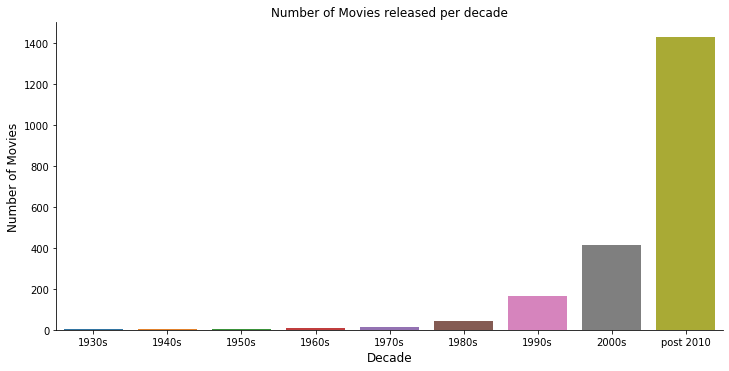

In [79]:
# Plot number of movies released per decade
sns.catplot(x = 'decade', kind = 'count', data = movies, aspect = 2)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Decade', fontsize=12)
plt.title('Number of Movies released per decade', fontsize = 12)
plt.show()

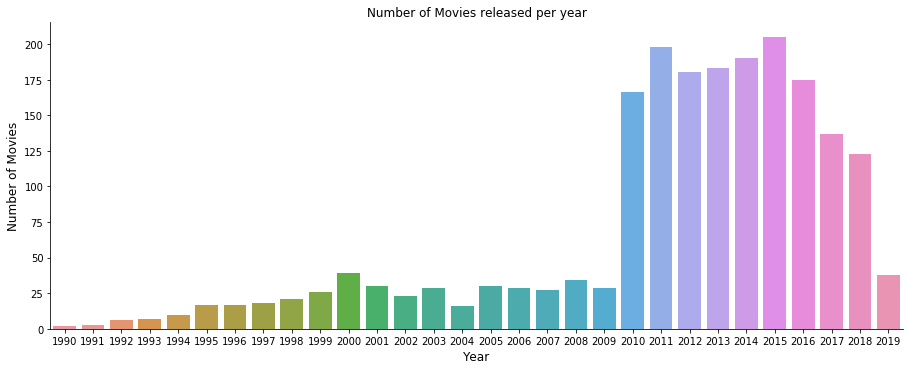

In [80]:
# Plot number of movies released per year 1990 onwards
sns.catplot(x = 'release_year', kind = 'count', data = movies[movies['release_year'] >=1990], aspect = 2.5)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Movies released per year', fontsize = 12)
plt.show()

## Profit and Profit Margin

The business value of this venture relies on making profit.

In [81]:
# Create profit column as worldwide_gross less production_budget
movies['profit'] = movies.apply(lambda x: (x['worldwide_gross']) - (x['production_budget']), axis = 1)

In [82]:
movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit
0,2019-03-08,Captain Marvel,175000000,426525952,1123061550,2019,tt4154664,123.0,"Action,Adventure,Sci-Fi",post 2010,948061550
1,2019-05-31,Rocketman,41000000,57342725,108642725,2019,tt2066051,121.0,"Biography,Drama,Music",post 2010,67642725
2,2019-05-03,The Intruder,8000000,35095904,36005871,2019,tt6722030,102.0,"Drama,Horror,Mystery",post 2010,28005871
3,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,2019,tt7961060,100.0,"Action,Adventure,Animation",post 2010,114247755
4,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,2019,tt2386490,104.0,"Action,Adventure,Animation",post 2010,390258283


In [83]:
# Get summary statistics for profit
# Use plain formatting to remove scientific notation
movies['profit'].describe().apply(lambda x: format(x, 'f'))

count          2084.000000
mean       81112740.337332
std       183543483.470248
min      -200237650.000000
25%        -1406246.750000
50%        15904174.500000
75%        80066414.750000
max      2351345279.000000
Name: profit, dtype: object

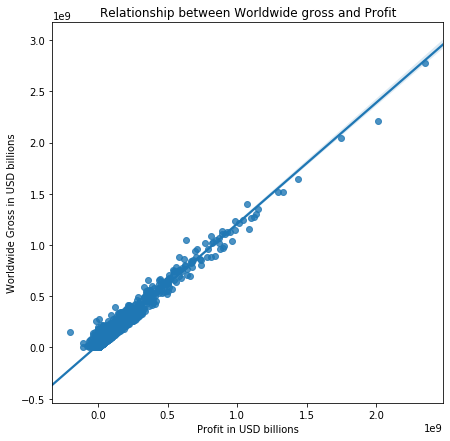

In [84]:
# Plot relationship between profit and worldwide gross
plt.figure(figsize = (7,7))
sns.regplot(x = 'profit', y = 'worldwide_gross', data = movies)
plt.title('Relationship between Worldwide gross and Profit')
plt.xlabel('Profit in USD billions')
plt.ylabel('Worldwide Gross in USD billions')
plt.show()

In [85]:
recentmovies = movies[movies['release_year'] >= 2010]

In [86]:
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

In [87]:
toprecentmovies['profit'].describe().apply(lambda x: format(x, 'f'))

count           100.000000
mean      691605832.340000
std       259663089.720533
min       326477240.000000
25%       501262532.000000
50%       619951567.000000
75%       842264720.500000
max      1748134200.000000
Name: profit, dtype: object

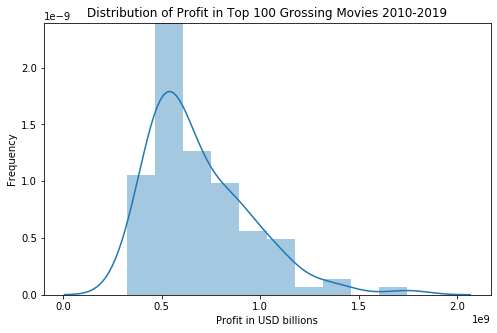

In [88]:
plt.figure(figsize = (8,5))
sns.distplot(toprecentmovies['profit'])
plt.title('Distribution of Profit in Top 100 Grossing Movies 2010-2019')
plt.xlabel('Profit in USD billions')
plt.ylabel('Frequency')
plt.show()

In [89]:
# Create profit margin column
movies['profit_margin'] = movies.apply(lambda x: ((x['profit']) / (x['worldwide_gross']))*100, axis = 1)

In [90]:
# Get summary statistics for profit margin
# Use plain formatting to remove scientific notation
movies['profit_margin'].describe().apply(lambda x: format(x, 'f'))

count        2084.000000
mean        -3961.209081
std         87412.139510
min      -3846053.846154
25%           -41.432339
50%            48.808903
75%            74.379810
max            99.759941
Name: profit_margin, dtype: object

In [91]:
recentmovies = movies[movies['release_year'] >= 2010]
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]
toprecentmovies['profit_margin'].describe()

count    100.000000
mean      79.614097
std        8.313902
min       54.264473
25%       75.319471
50%       80.140636
75%       85.518691
max       94.981776
Name: profit_margin, dtype: float64

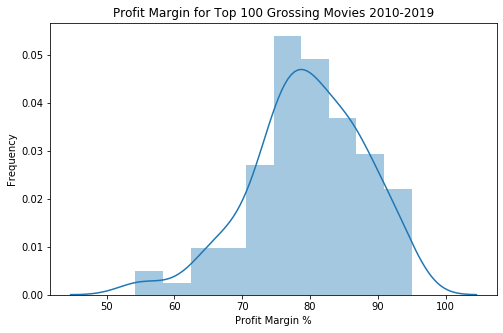

In [92]:
plt.figure(figsize = (8,5))
sns.distplot(toprecentmovies['profit_margin'])
plt.title('Profit Margin for Top 100 Grossing Movies 2010-2019')
plt.xlabel('Profit Margin %')
plt.ylabel('Frequency')
plt.show()

In [93]:
topprofit = recentmovies.sort_values('profit', ascending = False)
topprofit.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin
138,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,tt4154756,149.0,"Action,Adventure,Sci-Fi",post 2010,1748134200,85.352522
484,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,tt0369610,124.0,"Action,Adventure,Sci-Fi",post 2010,1433854864,86.960647
655,2015-04-03,Furious 7,190000000,353007020,1518722794,2015,tt2820852,137.0,"Action,Crime,Thriller",post 2010,1328722794,87.489488
1091,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,tt0848228,143.0,"Action,Adventure,Sci-Fi",post 2010,1292935897,85.177240
140,2018-02-16,Black Panther,200000000,700059566,1348258224,2018,tt1825683,134.0,"Action,Adventure,Sci-Fi",post 2010,1148258224,85.166046


In [94]:
topprofitmargin = recentmovies.sort_values('profit_margin', ascending = False)
topprofitmargin.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin
648,2015-07-10,The Gallows,100000,22764410,41656474,2015,tt2309260,81.0,"Horror,Mystery,Thriller",post 2010,41556474,99.759941
1154,2012-01-06,The Devil Inside,1000000,53262945,101759490,2012,tt1560985,83.0,Horror,post 2010,100759490,99.017291
1400,2011-04-01,Insidious,1500000,54009150,99870886,2011,tt1591095,103.0,"Horror,Mystery,Thriller",post 2010,98370886,98.498061
549,2015-04-17,Unfriended,1000000,32789645,64364198,2015,tt3713166,83.0,"Horror,Mystery,Thriller",post 2010,63364198,98.446341
1556,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,2010,tt1536044,91.0,Horror,2000s,174512032,98.309974


## Impact of Budget

In [95]:
# Describe production budget
# Use plain formatting to remove scientific notation
movies['production_budget'].describe().apply(lambda x: '%.5f' % x)

count         2084.00000
mean      39546872.35893
std       51173832.04753
min           9000.00000
25%        7000000.00000
50%       20000000.00000
75%       50000000.00000
max      425000000.00000
Name: production_budget, dtype: object

In [96]:
# Define bins based on statistics
bins = [0, 7000000, 20000000, 50000000, np.inf]
names = ['<7m', '7-20m', '20-50m', '>50m']

In [97]:
# Create budget_range column
movies['budget_range'] = pd.cut(movies['production_budget'], bins, labels=names)

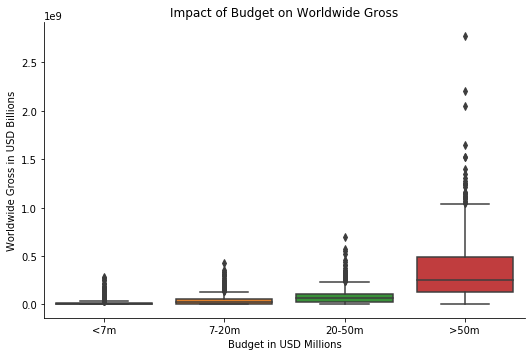

In [98]:
# Boxplot of Bugdet Range
sns.catplot(x = 'budget_range', y = 'worldwide_gross', aspect =1.5, kind = 'box', data = movies)
plt.title('Impact of Budget on Worldwide Gross')
plt.xlabel('Budget in USD Millions')
plt.ylabel('Worldwide Gross in USD Billions')
plt.show()

In [99]:
recentmovies = movies[movies['release_year'] >= 2010]

In [100]:
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

In [101]:
# Describe production budget
# Use plain formatting to remove scientific notation
toprecentmovies['production_budget'].describe().apply(lambda x: '%.5f' % x)

count          100.00000
mean     167792000.00000
std       66933194.01169
min       35000000.00000
25%      126500000.00000
50%      170000000.00000
75%      200000000.00000
max      410600000.00000
Name: production_budget, dtype: object

In [102]:
toprecentmovies[toprecentmovies['production_budget'] > 300000000]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,runtime_minutes,genres,decade,profit,profit_margin,budget_range
488,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,tt2395427,141.0,"Action,Adventure,Sci-Fi",post 2010,1072413963,76.436443,>50m
1279,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,136.0,"Action,Adventure,Fantasy",post 2010,635063875,60.733080,>50m


In [103]:
# Define bins based on statistics
bins = [0, 100000000, 150000000, 200000000, np.inf]
names = ['35-100m', '100-150m', '150-200m','200-420m' ]

In [104]:
# Reassign budget_range column
toprecentmovies['budget_range'] = pd.cut(toprecentmovies['production_budget'], bins, labels=names)

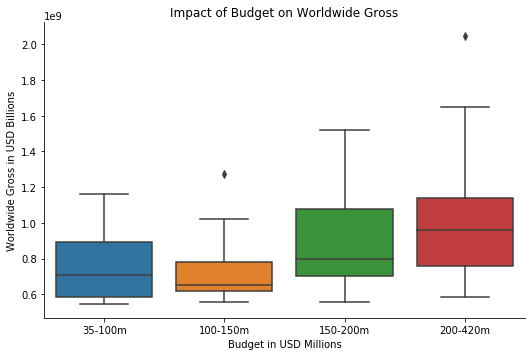

In [105]:
# Boxplot of budget range
sns.catplot(x = 'budget_range', y = 'worldwide_gross', kind = 'box', aspect = 1.5, data = toprecentmovies)
plt.title('Impact of Budget on Worldwide Gross')
plt.xlabel('Budget in USD Millions')
plt.ylabel('Worldwide Gross in USD Billions')
plt.show()

## Runtime

In [106]:
# Get statistics for runtime
movies['runtime_minutes'].describe()

count    2084.000000
mean      101.222169
std        23.391840
min         4.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       312.000000
Name: runtime_minutes, dtype: float64

In [107]:
def runtimeplot(df):
    sns.distplot(df['runtime_minutes'])
    plt.title('Runtime distribution')
    plt.xlabel('Minutes')
    plt.ylabel('Frequency')
    return plt.show()

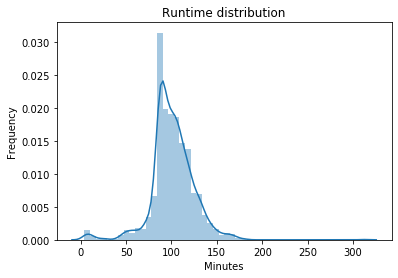

In [108]:
runtimeplot(movies)

In [109]:
toprecentmovies['runtime_minutes'].describe()

count    100.000000
mean     121.810000
std       23.017207
min       48.000000
25%      103.750000
50%      124.000000
75%      137.000000
max      169.000000
Name: runtime_minutes, dtype: float64

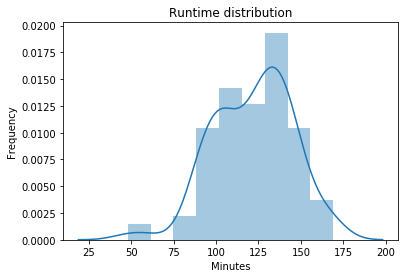

In [110]:
runtimeplot(toprecentmovies)

Does a longer movie require a larger production budget?

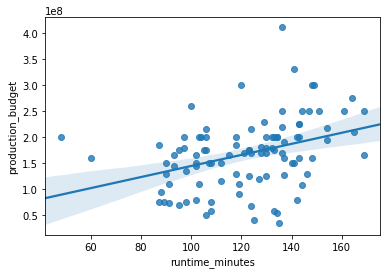

In [111]:
# plot relationshop between runtime and budget
sns.regplot(x = 'runtime_minutes', y = 'production_budget', data = toprecentmovies)

In [112]:
# Get the correlation coefficient between runtime and production budget
toprecentmovies['runtime_minutes'].corr(toprecentmovies['production_budget'])

0.36556201085161044

## Genre

In [113]:
# Preview relevant columns
movies[['movie', 'genres']].head()

,movie,genres
0,Captain Marvel,"Action,Adventure,Sci-Fi"
1,Rocketman,"Biography,Drama,Music"
2,The Intruder,"Drama,Horror,Mystery"
3,Dragon Ball Super: Broly,"Action,Adventure,Animation"
4,How to Train Your Dragon: The Hidden World,"Action,Adventure,Animation"


In [114]:
# Obtain unique values in genres column
genres = movies['genres'].unique()
genres[:5]

array(['Action,Adventure,Sci-Fi', 'Biography,Drama,Music',
       'Drama,Horror,Mystery', 'Action,Adventure,Animation',
       'Adventure,Comedy,Family'], dtype=object)

In [115]:
# Split genres
splitgenres = []
for genre in genres:
    splitgenres += genre.split(',')
splitgenres[:5]

['Action', 'Adventure', 'Sci-Fi', 'Biography', 'Drama']

In [116]:
# Use set to obtain unique values
uniquegenres = set(splitgenres)
uniquegenres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [117]:
# Turn back to list to be able to sort alphabetically
listofgenres = list(uniquegenres)
sortedgenres = sorted(listofgenres)
sortedgenres[:5]

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy']

In [118]:
# Create columns with genres
for genre in sortedgenres:
    movies[genre] = 0

In [119]:
# Split genres in genres column
movies['genres'] = movies['genres'].map(lambda x : x.split(','))

In [120]:
# Map to columns - set to 1 if genre applies
for index, genres in enumerate(movies['genres']):
    for genre in genres:
        movies.loc[index,genre] = 1

In [121]:
# Checking it worked with example genre Action
movies[['genres','Action']][:5]

,genres,Action
0,"[Action, Adventure, Sci-Fi]",1
1,"[Biography, Drama, Music]",0
2,"[Drama, Horror, Mystery]",0
3,"[Action, Adventure, Animation]",1
4,"[Action, Adventure, Animation]",1


In [122]:
# genre counter function
def genrecounter(df):
    '''
    param1 df: dataframe
    returns dictionary with genre key and value count
    also sorts dictionary based on values and removes nul values
    ''' 
    # Start with empty dictionary
    genredict = {}
    
    # Get genre columns
    genrecols = df.loc[:, 'Action':'Western'].columns
    
    # Go through each column and sum it
    for col in genrecols:
        genredict[col] = df[col].sum()
        
    # sort dictionary based on counts, ascending order so reverse = True    
    sortedgenresdict = {keys: values for keys, values in \
                        sorted(genredict.items(), key = lambda item: item[1], reverse = True)}
    
    # remove any key-value pairs where the value is 0
    nonnulgenresdict = {keys: values for keys, values in \
                        sortedgenresdict.items() if values != 0}

    return nonnulgenresdict

In [123]:
# Run genre counter function on Movies DataFrame
allgenrescount = genrecounter(movies)
allgenrescount

{'Drama': 999,
 'Comedy': 597,
 'Action': 494,
 'Adventure': 380,
 'Thriller': 322,
 'Crime': 258,
 'Horror': 231,
 'Romance': 223,
 'Documentary': 188,
 'Biography': 162,
 'Sci-Fi': 159,
 'Mystery': 151,
 'Fantasy': 136,
 'Family': 114,
 'Animation': 113,
 'Music': 61,
 'History': 55,
 'Sport': 44,
 'War': 34,
 'Western': 19,
 'Musical': 12,
 'News': 3}

In [124]:
def genreplot(dictionary,title):
    x_values = list(dictionary.keys())
    y_values = list(dictionary.values())
    plt.figure(figsize = (15,10))
    sns.barplot(y = x_values, x = y_values)
    plt.xlabel('Number of movies')
    plt.ylabel('Genre')
    plt.title(title)
    return plt.show()

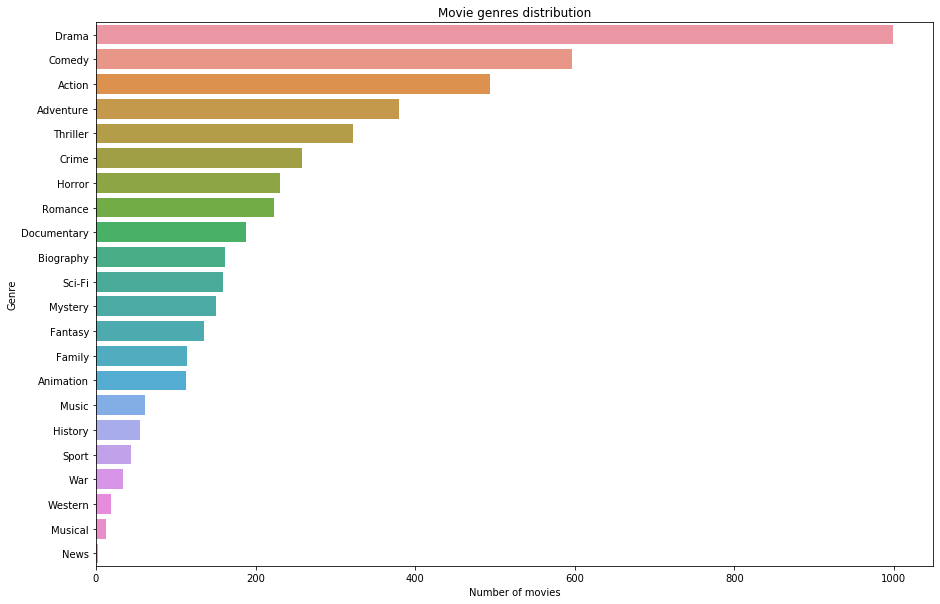

In [125]:
genreplot(allgenrescount,'Movie genres distribution')

In [126]:
# Obtain recent movies
recentmovies = movies[movies['release_year'] >= 2010]

# Run genre counter function on recentmovies DataFrame
recentgenrescount = genrecounter(recentmovies)
recentgenrescount

{'Drama': 772,
 'Comedy': 524,
 'Action': 440,
 'Adventure': 347,
 'Thriller': 248,
 'Crime': 232,
 'Romance': 193,
 'Horror': 179,
 'Biography': 142,
 'Sci-Fi': 138,
 'Mystery': 128,
 'Fantasy': 125,
 'Animation': 103,
 'Documentary': 91,
 'Family': 87,
 'Music': 51,
 'History': 48,
 'Sport': 33,
 'War': 24,
 'Western': 14,
 'Musical': 7,
 'News': 2}

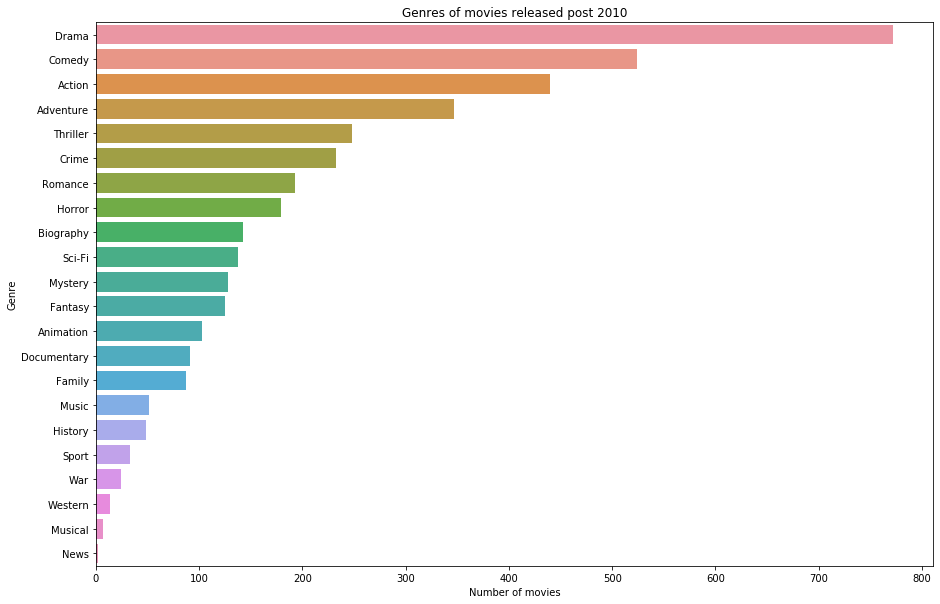

In [127]:
# Plot recent movie genres
genreplot(recentgenrescount,'Genres of movies released post 2010')

In [128]:
# Obtain top recent movies
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

# Run genre counter function on toprecentmovies DataFrame
toprecentgenrescount = genrecounter(toprecentmovies)
toprecentgenrescount

{'Adventure': 82,
 'Action': 60,
 'Sci-Fi': 31,
 'Comedy': 30,
 'Animation': 26,
 'Fantasy': 19,
 'Drama': 12,
 'Thriller': 10,
 'Family': 9,
 'Crime': 3,
 'Biography': 2,
 'Documentary': 1,
 'Horror': 1,
 'Music': 1,
 'Musical': 1,
 'Mystery': 1,
 'Romance': 1}

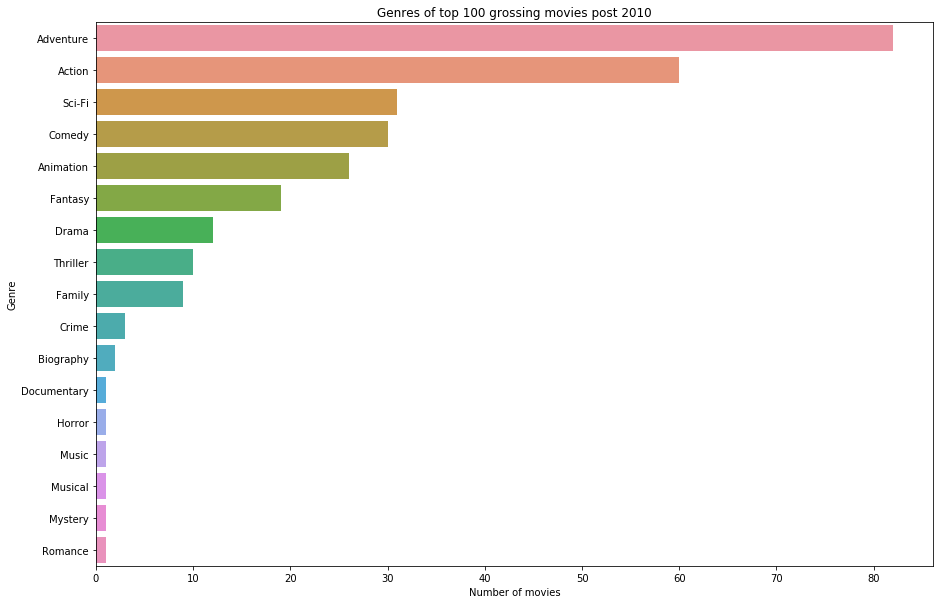

In [129]:
# Plot top recent movie genres
genreplot(toprecentgenrescount,'Genres of top 100 grossing movies post 2010')

In [130]:
topactionmovies = toprecentmovies[(toprecentmovies['Action'] == 1) | (toprecentmovies['Adventure'] == 1)]

In [131]:
topactionmovies['production_budget'].median()

175000000.0

In [132]:
recentmovies['production_budget'].median()

22000000.0

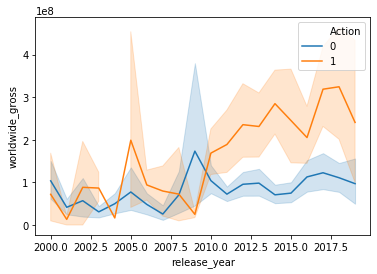

In [133]:
sns.lineplot(x = 'release_year', y = 'worldwide_gross', hue = 'Action', data = movies[movies['release_year']>= 2000])

### Future movies

In [134]:
futuremovies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,87.0,"Action,Adventure,Fantasy"
93,tt0427340,Masters of the Universe,Masters of the Universe,2021,87.0,"Action,Adventure,Drama"
229,tt0499097,Without Remorse,Without Remorse,2020,87.0,"Action,Crime,Drama"
289,tt0805647,The Witches,The Witches,2020,87.0,"Adventure,Comedy,Family"
386,tt0870154,Jungle Cruise,Jungle Cruise,2020,87.0,Adventure


In [135]:
futuremovies = futuremovies.reset_index(drop = True)

In [136]:
# Obtain unique values in genres column
genres = futuremovies['genres'].unique()
genres[:5]
# Split genres
splitgenres = []
for genre in genres:
    splitgenres += genre.split(',')
splitgenres[:5]
# Use set to obtain unique values
uniquegenres = set(splitgenres)
uniquegenres
# Turn back to list to be able to sort alphabetically
listofgenres = list(uniquegenres)
sortedgenres = sorted(listofgenres)
sortedgenres[:5]
# Create columns with genres
for genre in sortedgenres:
    futuremovies[genre] = 0

In [137]:
futuremovies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adventure,Animation,Biography,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0293429,Mortal Kombat,Mortal Kombat,2021,87.0,"Action,Adventure,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0427340,Masters of the Universe,Masters of the Universe,2021,87.0,"Action,Adventure,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0499097,Without Remorse,Without Remorse,2020,87.0,"Action,Crime,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0805647,The Witches,The Witches,2020,87.0,"Adventure,Comedy,Family",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0870154,Jungle Cruise,Jungle Cruise,2020,87.0,Adventure,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
# Split genres in genres column
futuremovies['genres'] = futuremovies['genres'].map(lambda x : x.split(','))

In [139]:
# Map to columns - set to 1 if genre applies
for index, genres in enumerate(futuremovies['genres']):
    for genre in genres:
        futuremovies.loc[index,genre] = 1

In [140]:
futuremovies.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [141]:
# Run genre counter function on Movies DataFrame
futuregenrescount = genrecounter(futuremovies)
futuregenrescount

{'Drama': 338,
 'Comedy': 185,
 'Action': 179,
 'Thriller': 137,
 'Horror': 113,
 'Adventure': 99,
 'Documentary': 84,
 'Animation': 65,
 'Crime': 62,
 'Sci-Fi': 58,
 'Fantasy': 55,
 'Romance': 45,
 'Family': 43,
 'Mystery': 29,
 'Biography': 27,
 'History': 16,
 'Musical': 11,
 'Western': 9,
 'Music': 8,
 'War': 6,
 'Sport': 2,
 'News': 1}

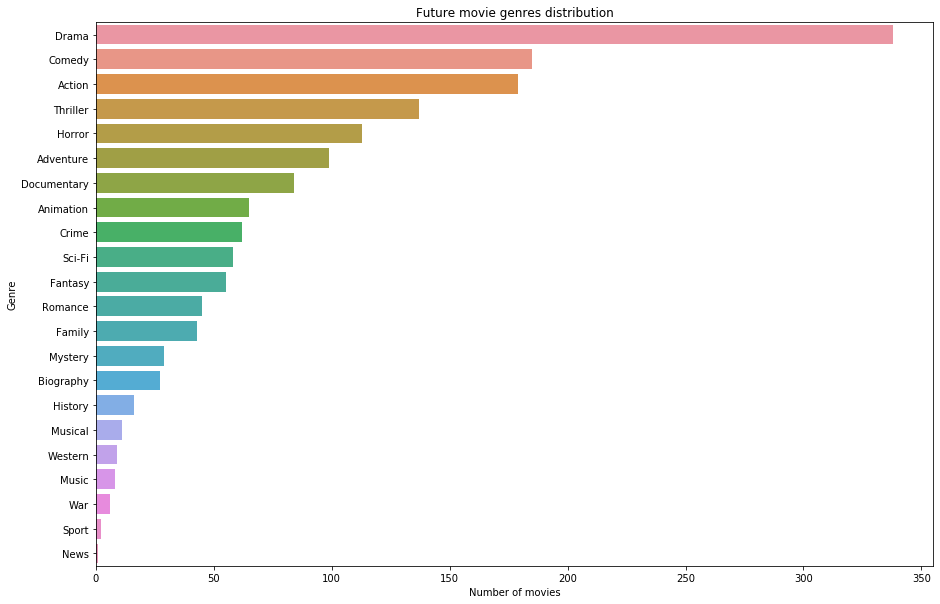

In [142]:
genreplot(futuregenrescount,'Future movie genres distribution')

## Release date

### Release month

In [143]:
# View relevant columns
movies[['release_date', 'movie']]

,release_date,movie
0,2019-03-08,Captain Marvel
1,2019-05-31,Rocketman
2,2019-05-03,The Intruder
3,2019-01-16,Dragon Ball Super: Broly
4,2019-02-22,How to Train Your Dragon: The Hidden World
...,...,...
2079,1942-08-13,Bambi
2080,1940-11-13,Fantasia
2081,1940-03-21,Rebecca
2082,1937-12-21,Snow White and the Seven Dwarfs


In [144]:
# Create month column 
movies['release_month'] = pd.DatetimeIndex(movies['release_date']).month

In [145]:
# View relevant columns/ check
movies[['release_date', 'release_month', 'movie']].head()

,release_date,release_month,movie
0,2019-03-08,3,Captain Marvel
1,2019-05-31,5,Rocketman
2,2019-05-03,5,The Intruder
3,2019-01-16,1,Dragon Ball Super: Broly
4,2019-02-22,2,How to Train Your Dragon: The Hidden World


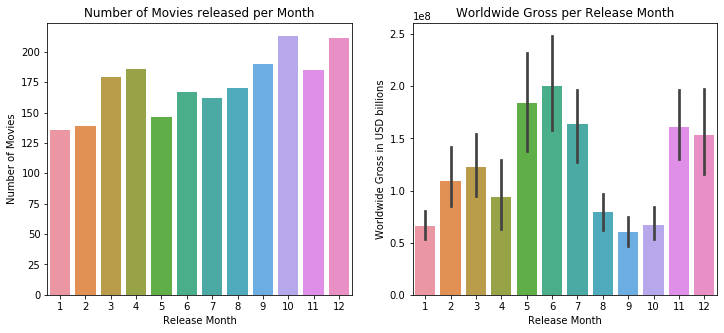

In [146]:
# Plot release month for all movies
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,5))
sns.catplot( x = 'release_month', kind = 'count', data = movies, ax = ax[0])
ax[0].set_xlabel('Release Month')
ax[0].set_ylabel('Number of Movies')
ax[0].set_title('Number of Movies released per Month')
sns.catplot( x = 'release_month', y = 'worldwide_gross', kind = 'bar', data = movies, ax = ax[1])
ax[1].set_xlabel('Release Month')
ax[1].set_ylabel('Worldwide Gross in USD billions')
ax[1].set_title('Worldwide Gross per Release Month')
plt.close(2)
plt.close(3)
plt.show()

In [147]:
# Obtain recent movies
recentmovies = movies[movies['release_year'] >= 2010]

In [148]:
# Obtain top recent movies
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

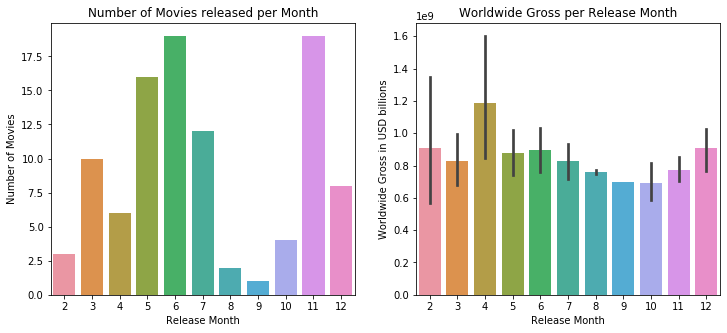

In [149]:
# Plot release month for top recent movies
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,5))
sns.catplot( x = 'release_month', kind = 'count', data = toprecentmovies, ax = ax[0])
ax[0].set_xlabel('Release Month')
ax[0].set_ylabel('Number of Movies')
ax[0].set_title('Number of Movies released per Month')
sns.catplot( x = 'release_month', y = 'worldwide_gross', kind = 'bar', data = toprecentmovies, ax = ax[1])
ax[1].set_xlabel('Release Month')
ax[1].set_ylabel('Worldwide Gross in USD billions')
ax[1].set_title('Worldwide Gross per Release Month')
plt.close(2)
plt.close(3)
plt.show()

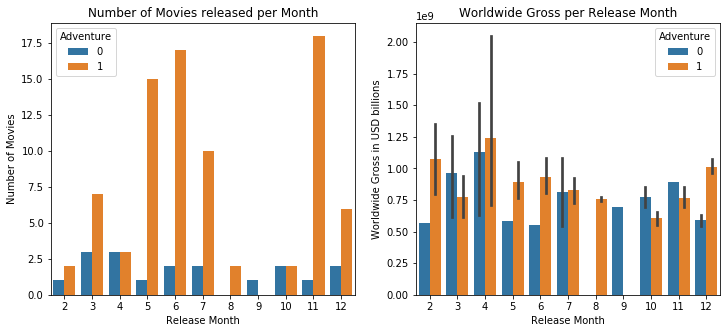

In [150]:
# Plot release month for top recent movies - distinguishing whether adventure film or not
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,5))
sns.catplot( x = 'release_month', kind = 'count', hue = 'Adventure', data = toprecentmovies, ax = ax[0])
ax[0].set_xlabel('Release Month')
ax[0].set_ylabel('Number of Movies')
ax[0].set_title('Number of Movies released per Month')
sns.catplot( x = 'release_month', y = 'worldwide_gross', kind = 'bar', hue = 'Adventure',data = toprecentmovies, ax = ax[1])
ax[1].set_xlabel('Release Month')
ax[1].set_ylabel('Worldwide Gross in USD billions')
ax[1].set_title('Worldwide Gross per Release Month')
plt.close(2)
plt.close(3)
plt.show()

### Release day

In [151]:
# View relevant columns
movies[['release_date', 'movie']]

,release_date,movie
0,2019-03-08,Captain Marvel
1,2019-05-31,Rocketman
2,2019-05-03,The Intruder
3,2019-01-16,Dragon Ball Super: Broly
4,2019-02-22,How to Train Your Dragon: The Hidden World
...,...,...
2079,1942-08-13,Bambi
2080,1940-11-13,Fantasia
2081,1940-03-21,Rebecca
2082,1937-12-21,Snow White and the Seven Dwarfs


In [152]:
# Create day column 
movies['release_day'] = pd.DatetimeIndex(movies['release_date']).dayofweek

In [153]:
# View relevant columns/ check
movies[['release_date', 'release_day', 'movie']].head()

,release_date,release_day,movie
0,2019-03-08,4,Captain Marvel
1,2019-05-31,4,Rocketman
2,2019-05-03,4,The Intruder
3,2019-01-16,2,Dragon Ball Super: Broly
4,2019-02-22,4,How to Train Your Dragon: The Hidden World


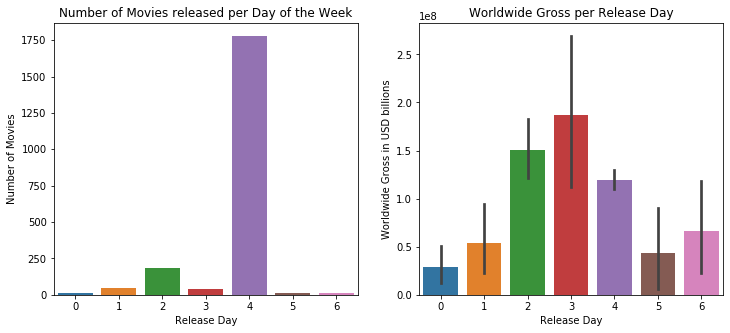

In [154]:
# Plot release day for all movies
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,5))
sns.catplot( x = 'release_day', kind = 'count', data = movies, ax = ax[0])
ax[0].set_xlabel('Release Day')
ax[0].set_ylabel('Number of Movies')
ax[0].set_title('Number of Movies released per Day of the Week')
sns.catplot( x = 'release_day', y = 'worldwide_gross', kind = 'bar', data = movies, ax = ax[1])
ax[1].set_xlabel('Release Day')
ax[1].set_ylabel('Worldwide Gross in USD billions')
ax[1].set_title('Worldwide Gross per Release Day')
plt.close(2)
plt.close(3)
plt.show()

In [155]:
# Obtain recent movies
recentmovies = movies[movies['release_year'] >= 2010]

In [156]:
# Obtain top recent movies
toprecentmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

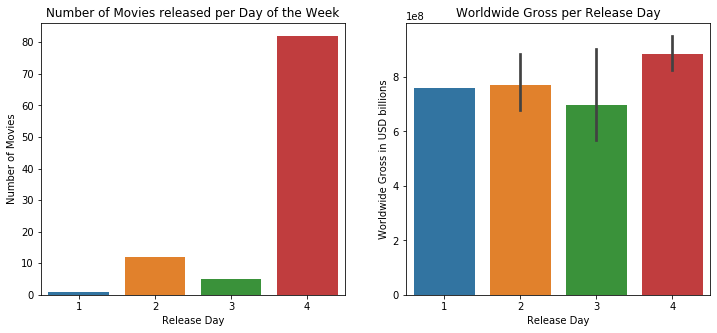

In [157]:
# Plot release day for top recent movies
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,5))
sns.catplot( x = 'release_day', kind = 'count', data = toprecentmovies, ax = ax[0])
ax[0].set_xlabel('Release Day')
ax[0].set_ylabel('Number of Movies')
ax[0].set_title('Number of Movies released per Day of the Week')
sns.catplot( x = 'release_day', y = 'worldwide_gross', kind = 'bar', data = toprecentmovies, ax = ax[1])
ax[1].set_xlabel('Release Day')
ax[1].set_ylabel('Worldwide Gross in USD billions')
ax[1].set_title('Worldwide Gross per Release Day')
plt.close(2)
plt.close(3)
plt.show()

## Correlations

In [158]:
# Drop genre cols
genrecols = toprecentmovies.loc[:, 'Action':'Western'].columns
relevantcols = toprecentmovies.drop(genrecols, axis = 1)

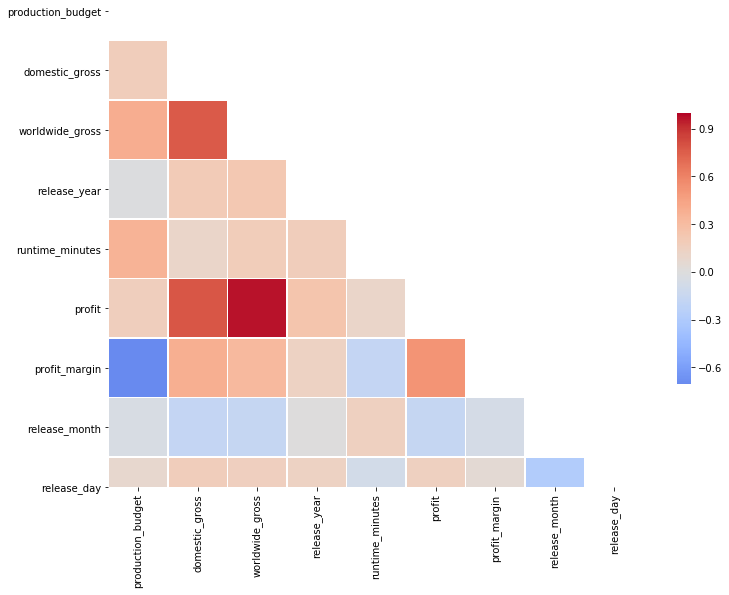

In [159]:
# Code inspired from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Create correlation matrix
corr = relevantcols.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', center= 0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

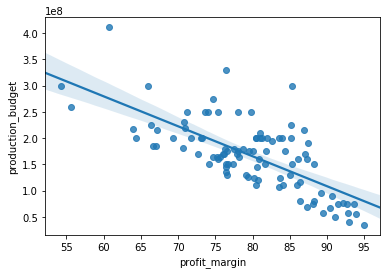

In [160]:
sns.regplot(x = 'profit_margin', y = 'production_budget', data = toprecentmovies)

In [161]:
toprecentmovies['profit_margin'].corr(toprecentmovies['production_budget']).round(2)

-0.71

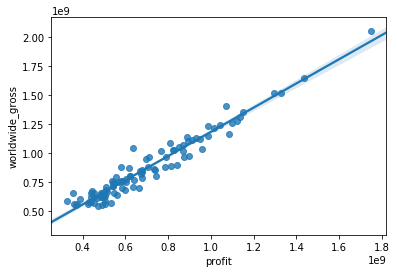

In [162]:
sns.regplot(x = 'profit', y = 'worldwide_gross', data = toprecentmovies)

In [163]:
toprecentmovies['profit'].corr(toprecentmovies['worldwide_gross']).round(2)

0.97

## Case study: Netflix Original Films

In [164]:
netflixdf

,movie,genre,release_date,runtime_minutes,language
0,Beasts of No Nation,War/drama,2015-10-16,136,English/Twi
1,The Ridiculous 6,Western,2015-12-11,119,English
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,2016-02-26,103,English
3,Pee-wee's Big Holiday,Adventure,2016-03-18,89,English
4,Special Correspondents,Satire,2016-04-29,100,English
...,...,...,...,...,...
198,Marriage Story,Drama,2019-12-06,136,English
199,6 Underground,Action,2019-12-13,128,English
200,The Two Popes,Drama,2019-12-20,125,English
201,Como Caído del Cielo,Musical comedy,2019-12-24,117,Spanish


In [165]:
# Create new column release_year
netflixdf['release_year']=pd.DatetimeIndex(netflixdf['release_date']).year
netflixdf.head()

,movie,genre,release_date,runtime_minutes,language,release_year
0,Beasts of No Nation,War/drama,2015-10-16,136,English/Twi,2015
1,The Ridiculous 6,Western,2015-12-11,119,English,2015
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Action,2016-02-26,103,English,2016
3,Pee-wee's Big Holiday,Adventure,2016-03-18,89,English,2016
4,Special Correspondents,Satire,2016-04-29,100,English,2016


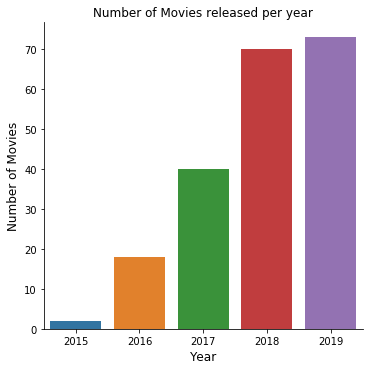

In [166]:
# Plot number of movies released per year
sns.catplot(x = 'release_year', kind = 'count', data = netflixdf)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Movies released per year', fontsize = 12)
plt.show()

In [167]:
# Describe runtime
netflixdf['runtime_minutes'].describe()

count    203.000000
mean     102.571429
std       16.617079
min       70.000000
25%       92.500000
50%       99.000000
75%      108.000000
max      209.000000
Name: runtime_minutes, dtype: float64

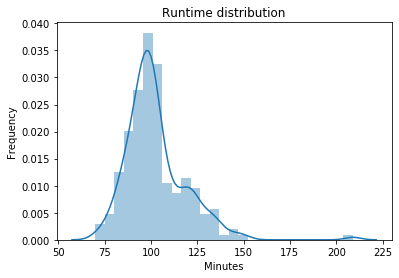

In [168]:
# Plot runtime
runtimeplot(netflixdf)

In [169]:
# Investigate genres 
netflixdf['genre'].unique()

array(['War/drama', 'Western', 'Action', 'Adventure', 'Satire',
       'Action comedy', 'Comedy-drama', 'Comedy', 'Thriller', 'Drama',
       'Science fiction/Thriller', 'War film', 'Mockumentary', 'Horror',
       'Science fiction/Action', 'Biopic', 'Heist film',
       'Science fiction/Drama', 'Romance', 'Dark comedy',
       'Anime/Science fiction', 'War-Comedy', 'Crime thriller',
       'Science fiction/Adventure', 'Horror thriller', 'Comedy horror',
       'Black comedy', 'Teen comedy horror', 'Horror/crime drama',
       'Action thriller', 'Romantic comedy', 'Romantic drama',
       'Urban fantasy', 'Biographical/Comedy', 'Science fiction',
       'Science fiction/Mystery', 'Crime drama', 'Family film',
       'Action/Comedy', 'Musical/Western/Fantasy', 'Sports-drama',
       'Teen comedy-drama', 'Drama/Horror', 'Science fiction thriller',
       'Adventure/Comedy', 'Science fiction-thriller',
       'Romantic comedy-drama', 'Animation/Action/Science fiction',
       'Spy thrille

In [170]:
# Remove special characters "," "/" and "-" from genres
# Convert to lower case
# Split and select first word
netflixdf['genre'] = netflixdf['genre'].map( \
    lambda x : x.replace(',',' ').replace('/',' ').replace('-',' ').lower().split()[0])

# Repair 'science' to 'science-fiction', 'coming' to 'coming of age'

In [171]:
netflixdf['genre'].unique()

array(['war', 'western', 'action', 'adventure', 'satire', 'comedy',
       'thriller', 'drama', 'science', 'mockumentary', 'horror', 'biopic',
       'heist', 'romance', 'dark', 'anime', 'crime', 'black', 'teen',
       'romantic', 'urban', 'biographical', 'family', 'musical', 'sports',
       'animation', 'spy', 'historical', 'psychological', 'coming',
       'mystery'], dtype=object)

In [172]:
# Repair 'science' to 'science-fiction', 
# 'coming' to 'comedy'
# 'black' to 'comedy'
# 'crime' to 'drama'
# 'dark' to 'comedy'
# 'romantic' to 'comedy'
# 'psychological' to 'thriller'
netflixdf['genre'] = netflixdf['genre'].replace({'science': 'sci-fi', 'coming': 'comedy' \
                                          , 'dark': 'comedy', 'crime': 'drama' \
                                          , 'romantic' : 'comedy', 'psychological' : 'thriller'})

In [173]:
netflixdf['genre'].unique()

array(['war', 'western', 'action', 'adventure', 'satire', 'comedy',
       'thriller', 'drama', 'sci-fi', 'mockumentary', 'horror', 'biopic',
       'heist', 'romance', 'anime', 'black', 'teen', 'urban',
       'biographical', 'family', 'musical', 'sports', 'animation', 'spy',
       'historical', 'mystery'], dtype=object)

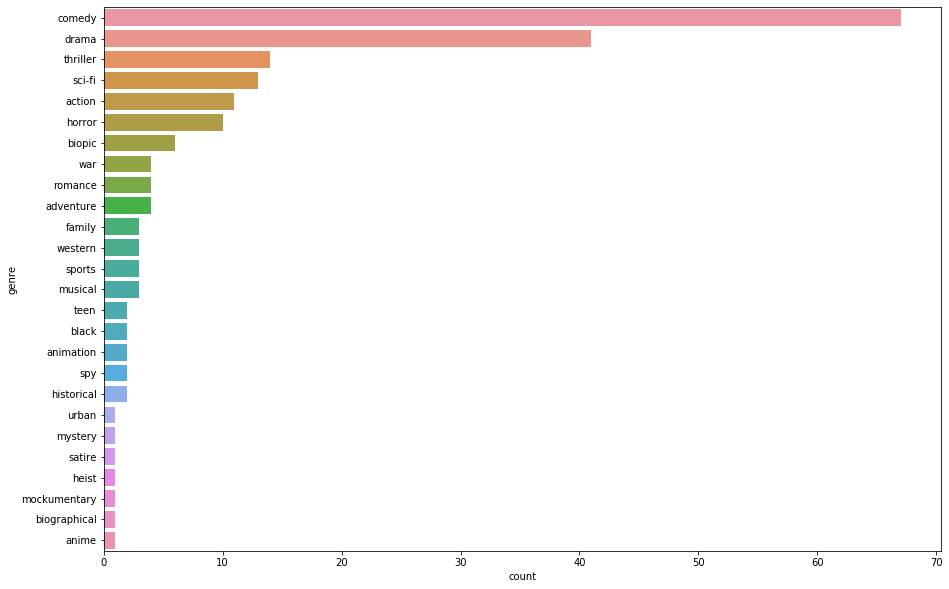

In [174]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'genre',order = netflixdf['genre'].value_counts().index, data = netflixdf)

# Conclusion and Future Work